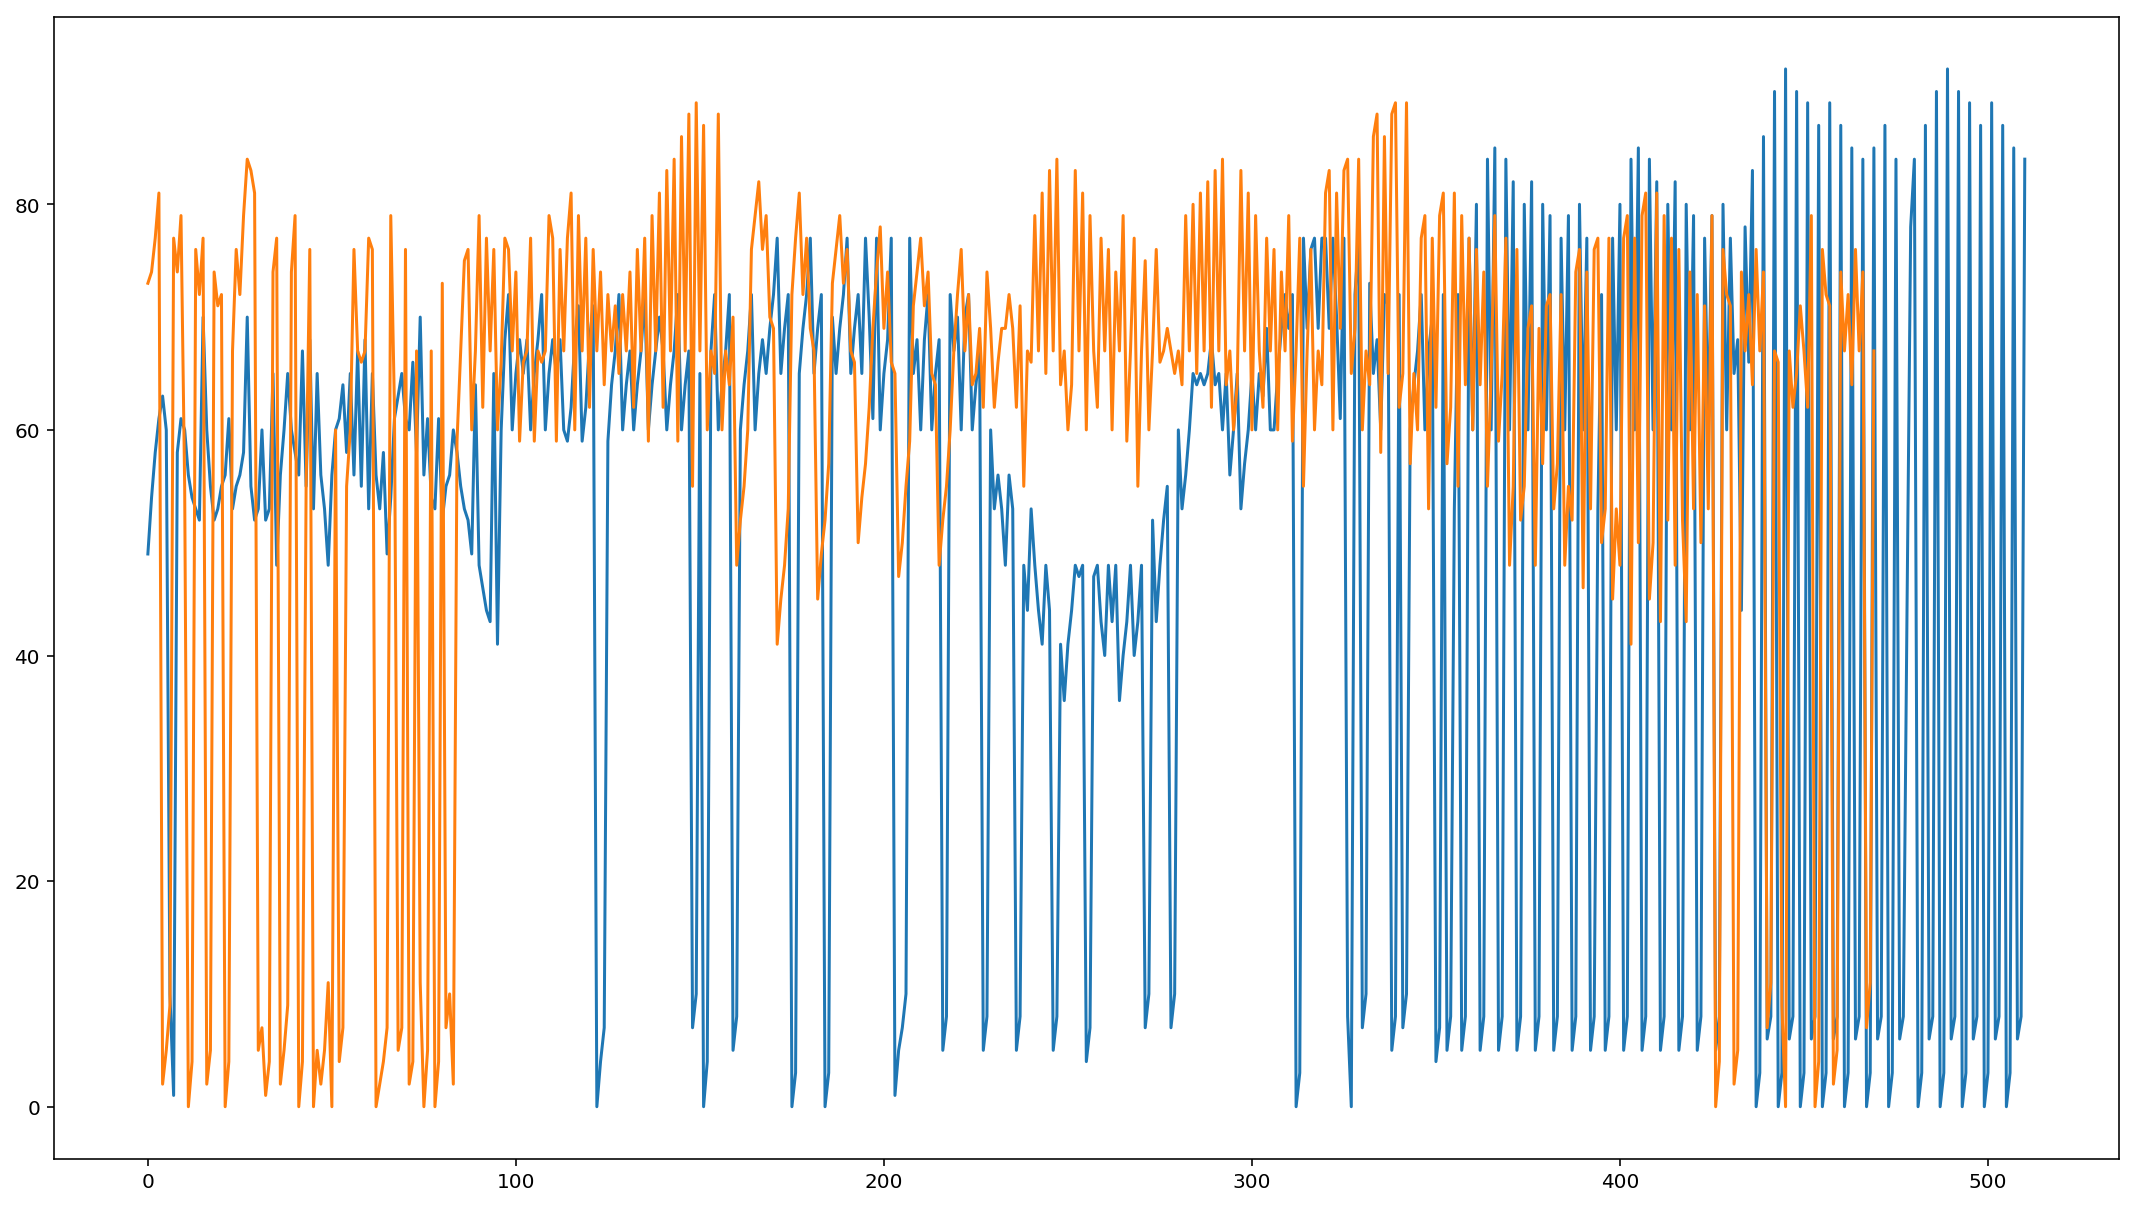

In [9]:
import numpy
import matplotlib.pyplot as plt
from music21 import converter, instrument, note, chord, pitch, midi
import keras
from keras.utils import np_utils


notes1 = []
notes2=[]
midi1 = converter.parse("test_output_Beeth.mid")
midi2 = converter.parse("test_output_Mozart.mid")
notes_to_parse1 = None
notes_to_parse2 = None
#feature 1
duration1 = []
duration2 = []
#feature 2 
pitchesarr1 = []
pitchesarr2 = []
parts1 = instrument.partitionByInstrument(midi1)
parts2 = instrument.partitionByInstrument(midi2)

if parts1: # file has instrument parts
    notes_to_parse1 = parts1.parts1[0].recurse()
    print(parts1.parts1)
else: # file has notes in a flat structure
    notes_to_parse1 = midi1.flat.notes
    
for element in notes_to_parse1:
    if isinstance(element, note.Note):
        pitchesarr1.append(element.pitch.ps)
        notes1.append(str(element.pitch)) 
        duration1.append(element.quarterLength)
        #pitch_list.append(pitch.Pitch(element))
        
    elif isinstance(element, chord.Chord):
        notes1.append('.'.join(str(n) for n in element.normalOrder))
        for n in element.normalOrder:
            pitchesarr1.append(n)
        duration1.append(element.quarterLength)

if parts2: # file has instrument parts
    notes_to_parse2 = parts2.parts2[0].recurse()
    print(parts2.parts2)
else: # file has notes in a flat structure
    notes_to_parse2 = midi2.flat.notes
    
for element in notes_to_parse2:
    if isinstance(element, note.Note):
        pitchesarr2.append(element.pitch.ps)
        notes2.append(str(element.pitch)) 
        duration2.append(element.quarterLength)
        #pitch_list.append(pitch.Pitch(element))
        
    elif isinstance(element, chord.Chord):
        notes2.append('.'.join(str(n) for n in element.normalOrder))
        for n in element.normalOrder:
            pitchesarr2.append(n)
        duration2.append(element.quarterLength)
    
plt.figure(figsize = (18.5, 10.5))
plt.plot(pitchesarr1)
plt.plot(pitchesarr2)

#with open('data/notes', 'wb') as filepath:
    #pickle.dump(notes, filepath)
        
#with open('data/pitches', 'wb') as filepath:
    #pickle.dump(pitchesarr, filepath)
    

def create_network(network_input, n_vocab):
    model = Sequential()
 
    model.add(LSTM(
        256,
        input_shape=(network_input.shape[1], network_input.shape[2]),
        return_sequences=True
    ))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences = True, stateful = True))
    model.add(Dropout(0.2))
    model.add(LSTM(256, return_sequences = True, stateful = True))
    model.add(Dropout(0.2))
    model.add(TimeDistributed(Dense(n_vocab)))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    return model
# def prepare_sequences(notes, n_vocab):
#     """ Prepare the sequences used by the Neural Network """
#     sequence_length = 100

#     # get all pitch names
#     pitchnames = sorted(set(item for item in notes))

#      # create a dictionary to map pitches to integers
#     note_to_int = dict((note, number) for number, note in enumerate(pitchnames))

#     network_input = []
#     network_output = []

#     # create input sequences and the corresponding outputs
#     for i in range(0, len(notes) - sequence_length, 1):
#         sequence_in = notes[i:i + sequence_length]
#         sequence_out = notes[i + sequence_length]
#         network_input.append([note_to_int[char] for char in sequence_in])
#         network_output.append(note_to_int[sequence_out])

#     n_patterns = len(network_input)

#     # reshape the input into a format compatible with LSTM layers
#     network_input = numpy.reshape(network_input, (n_patterns, sequence_length, 1))
#     # normalize input
#     network_input = network_input / float(n_vocab)

#     network_output = np_utils.to_categorical(network_output)

#     return (network_input, network_output)

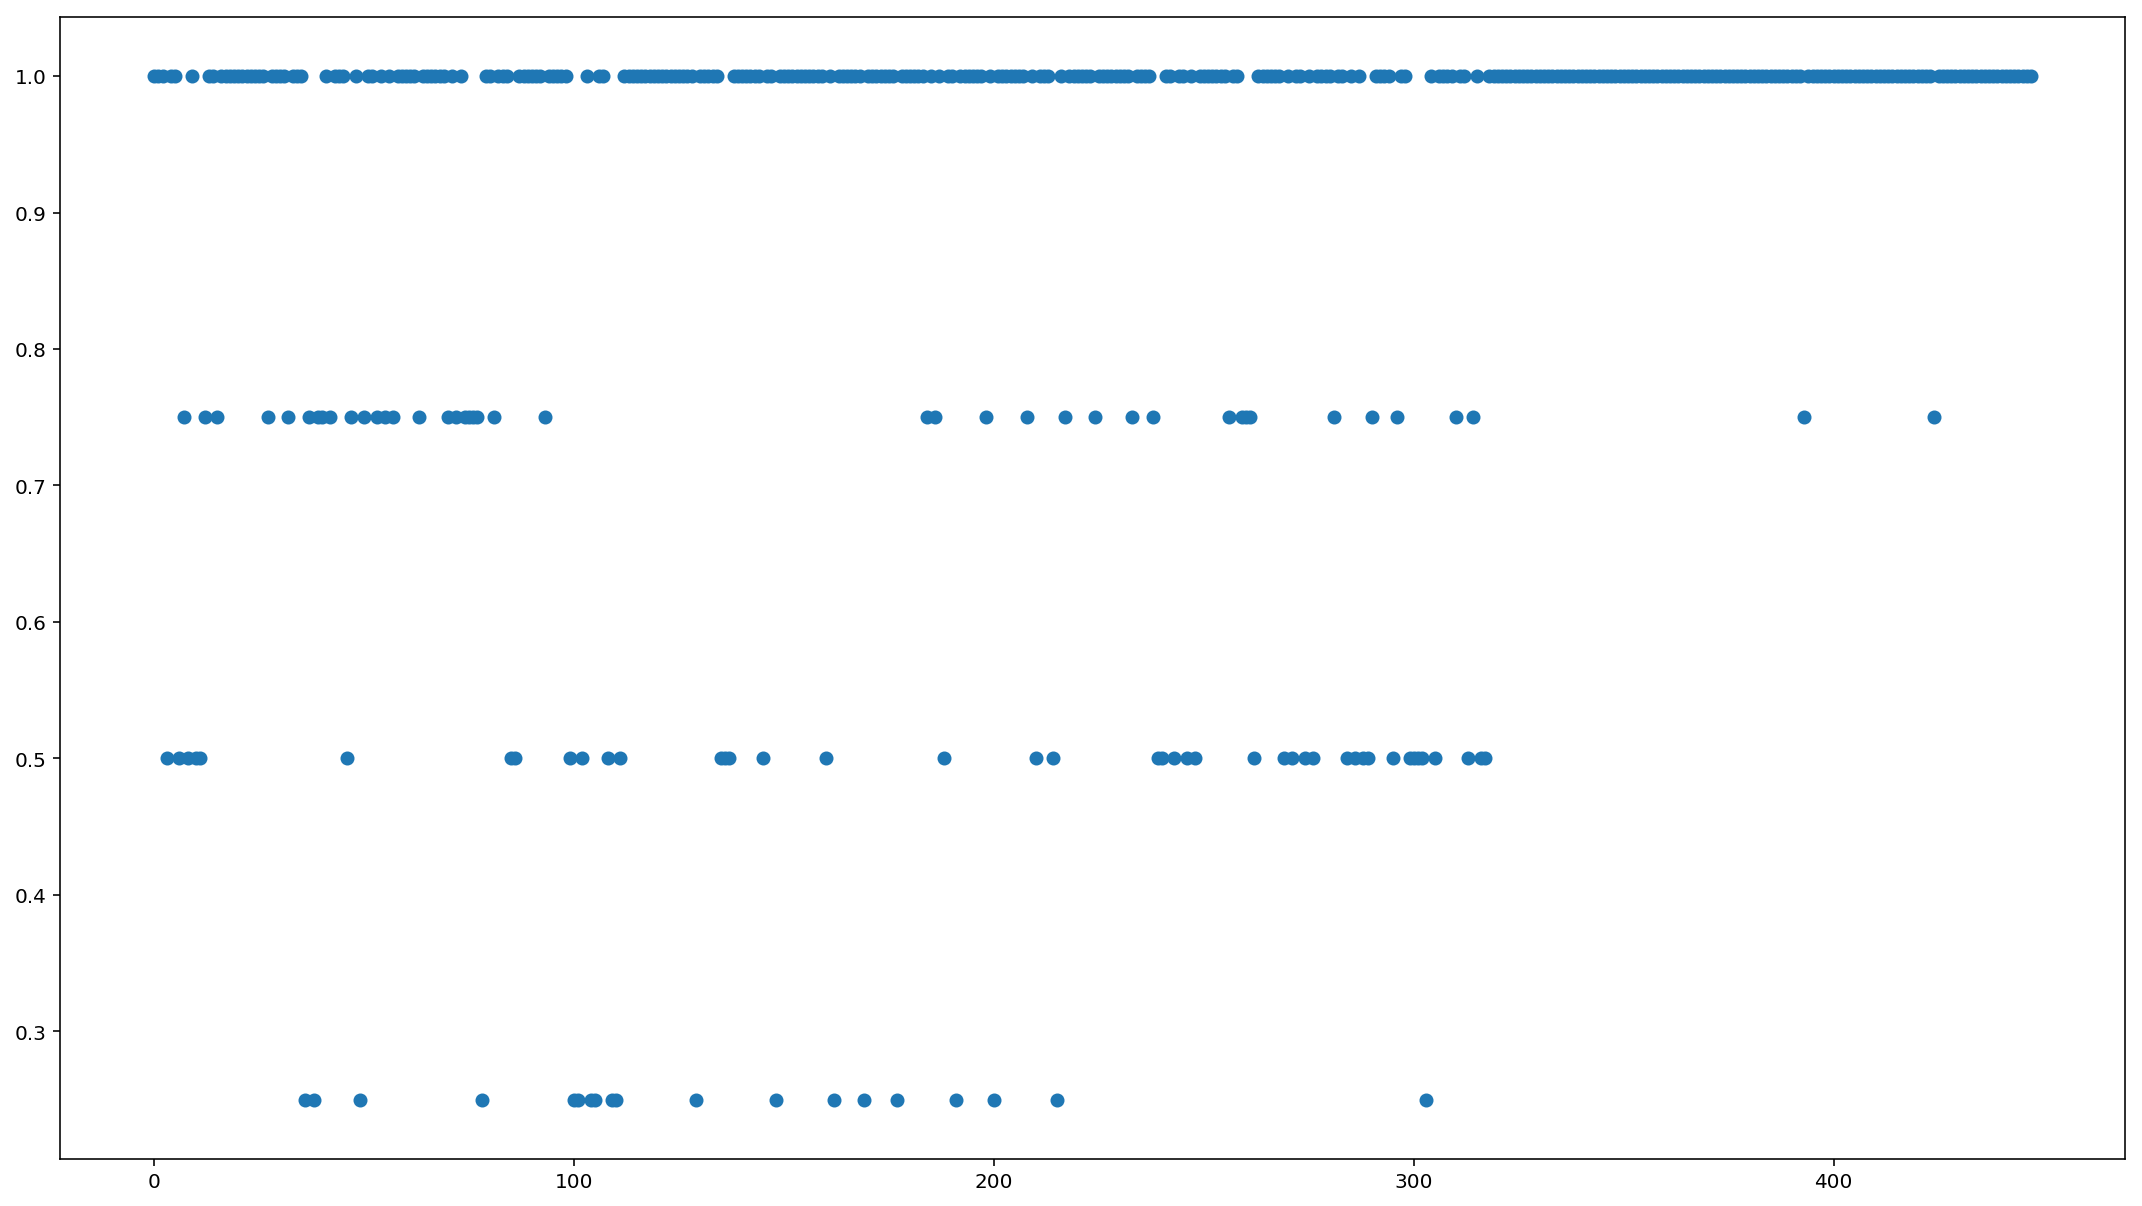

In [4]:
plt.figure(figsize = (18.5, 10.5))
plt.scatter([x for x in range(len(duration))],duration)